In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [3]:
train_dataset = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
test_dataset = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

In [6]:
print(train_dataset.loc[0])

survived                        0
sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object


In [128]:
print(test_dataset.loc[0])

survived                        0
sex                             1
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
deck                      unknown
embark_town           Southampton
alone                           1
class_Second                False
class_Third                  True
family size                     0
is_child                        0
fare_per_person              8.05
Name: 0, dtype: object


In [10]:
print(train_dataset.isnull().sum())

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64


In [82]:
# Drop Duplicates
train_dataset.drop_duplicates(inplace=True)

In [80]:
# Handle Missing Values
miss = SimpleImputer(strategy='median')
train_dataset[['age', 'fare']] = miss.fit_transform(train_dataset[['age', 'fare']])

In [14]:
print(train_dataset.columns.to_list())

['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']


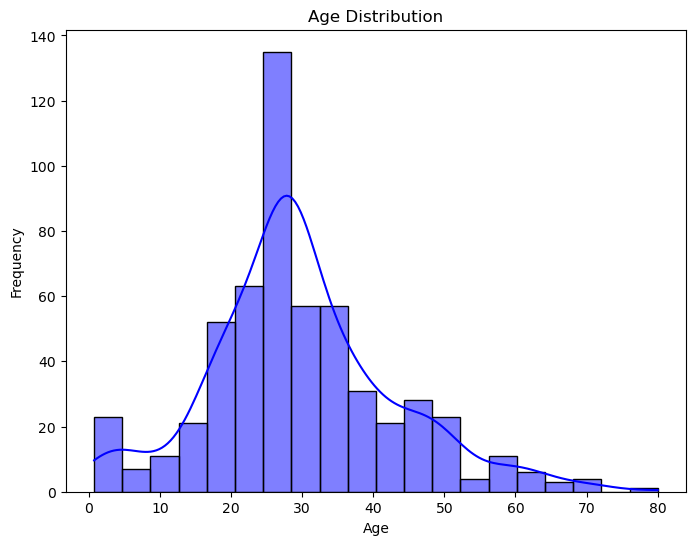

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(train_dataset['age'].dropna(), kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

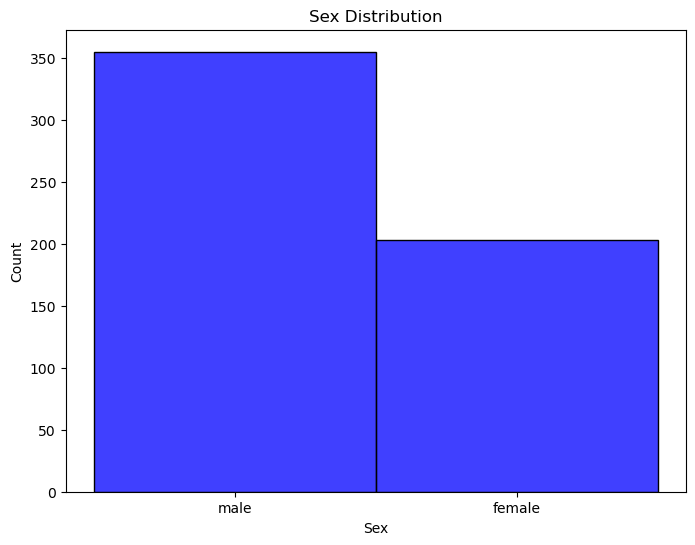

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(x=train_dataset['sex'].dropna(), color='blue')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.show()

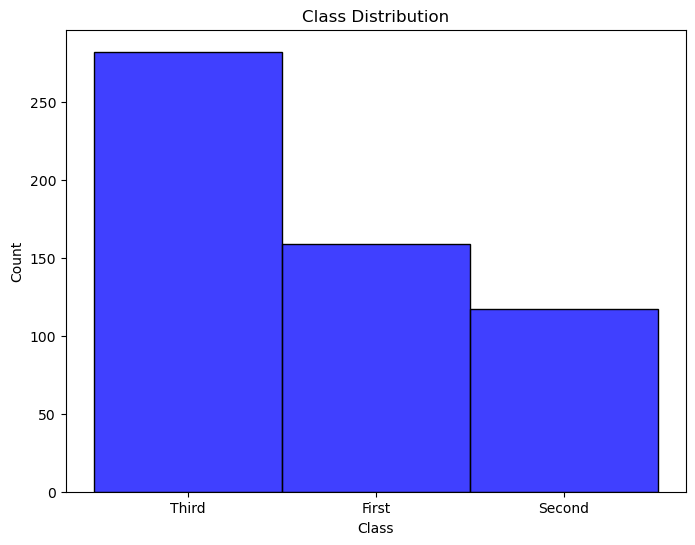

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(x=train_dataset['class'].dropna(), color='blue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.show()

In [22]:
print(train_dataset['sex'].value_counts())
print(train_dataset['class'].value_counts())
print(train_dataset['embark_town'].value_counts())
print(train_dataset['alone'].value_counts())

sex
male      355
female    203
Name: count, dtype: int64
class
Third     282
First     159
Second    117
Name: count, dtype: int64
embark_town
Southampton    401
Cherbourg      117
Queenstown      39
unknown          1
Name: count, dtype: int64
alone
y    316
n    242
Name: count, dtype: int64


In [84]:
# Encode Categorical Variables
label_encoder = LabelEncoder()
train_dataset['sex'] = label_encoder.fit_transform(train_dataset['sex'])
train_dataset['alone'] = label_encoder.fit_transform(train_dataset['alone'])

In [86]:
# One-Hot Encoding for multi-category features
train_dataset = pd.get_dummies(train_dataset, columns=['class'], drop_first=True)

In [88]:
# Feature Engineering
train_dataset['family size'] = train_dataset['n_siblings_spouses'] + train_dataset['parch']
train_dataset['is_child'] = (train_dataset['age'] < 10).astype(int)
train_dataset['fare_per_person'] = train_dataset['fare'] / (train_dataset['family size'] + 1)

In [98]:
print(train_dataset.head(15))

    survived  sex       age  n_siblings_spouses  parch      fare     deck  \
0          0    1 -0.600991                   1      0 -0.519491  unknown   
1          1    0  0.616239                   1      0  0.603069        C   
2          1    0 -0.296683                   0      0 -0.507657  unknown   
3          1    0  0.388008                   1      0  0.284300        C   
4          0    1 -0.144530                   0      0 -0.498308  unknown   
5          0    1 -2.122527                   3      1 -0.277126  unknown   
6          1    0 -0.220606                   0      2 -0.451413  unknown   
7          1    0 -1.209605                   1      0 -0.119422  unknown   
8          1    0 -1.970374                   1      1 -0.353824        G   
9          0    1 -0.753144                   0      0 -0.505466  unknown   
10         0    1  0.692316                   1      5 -0.098311  unknown   
11         0    0 -1.209605                   0      0 -0.508898  unknown   

In [94]:
# Define Features & Target
x = train_dataset.drop(columns=['survived', 'n_siblings_spouses', 'parch', 'deck', 'embark_town'])
y = train_dataset['survived']

In [100]:
print(x)
print(y)

     sex       age      fare  alone  family size  class_1  class_2  is_child  \
0      1 -0.600991 -0.519491      0            1    False     True         1   
1      0  0.616239  0.603069      0            1    False    False         1   
2      0 -0.296683 -0.507657      1            0    False     True         1   
3      0  0.388008  0.284300      0            1    False    False         1   
4      1 -0.144530 -0.498308      1            0    False     True         1   
..   ...       ...       ...    ...          ...      ...      ...       ...   
621    0 -0.600991 -0.462223      1            0    False     True         1   
622    1 -0.144530 -0.462515      1            0     True    False         1   
624    0 -0.829221 -0.120663      1            0    False    False         1   
625    0 -0.144530 -0.235490      0            3    False     True         1   
626    1  0.159778 -0.510725      1            0    False     True         1   

     fare_per_person  
0          -0.25

In [102]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [104]:
# Standardization
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
x_test[x_test.columns] = scaler.transform(x_test)

In [106]:
# Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [108]:
# Initialize Models with Hyperparameters
models = {
    'LogReg': LogisticRegression(max_iter=200),
    'DecisionTree': DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    'RandomForest': RandomForestClassifier(n_estimators=200, max_depth=10),
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    'GradientBoost': GradientBoostingClassifier(n_estimators=200),
    'SVC': SVC(kernel='rbf', C=1.0),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'NaiveBayes': GaussianNB(),
    'Perceptron': Perceptron(),
    'LinearSVC': LinearSVC(),
    'SGDClassifier': SGDClassifier(),
    'MLPClassifier': MLPClassifier(),
    'XGBoost': xgb.XGBClassifier(n_estimators=200, learning_rate=0.001),
    'LightGBM': lgb.LGBMClassifier(n_estimators=200),
    'CatBoost': CatBoostClassifier(iterations=1000, depth=6, silent=True)
}

In [110]:
# Train & Evaluate Models
best_accuracy = 0
best_model = ""

for model_name, model in models.items():
    model.fit(x_train, y_train)
    model_prediction = model.predict(x_test)
    model_accuracy = accuracy_score(y_test, model_prediction)

    if model_accuracy > best_accuracy:
        best_accuracy = model_accuracy
        best_model = model_name

    print(f'{model_name} Accuracy: {model_accuracy:.4f}')

LogReg Accuracy: 0.7946
DecisionTree Accuracy: 0.7679
RandomForest Accuracy: 0.8304


C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.7946
GradientBoost Accuracy: 0.8214
SVC Accuracy: 0.8125
KNN Accuracy: 0.7679
NaiveBayes Accuracy: 0.8036
Perceptron Accuracy: 0.7143
LinearSVC Accuracy: 0.7946
SGDClassifier Accuracy: 0.7411


C:\Users\user\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier Accuracy: 0.8125
XGBoost Accuracy: 0.8125
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 256
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 446, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.426009 -> initscore=-0.298153
[LightGBM] [Info] Start training from score -0.298153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [112]:
print(f"Best Model: {best_model} with Accuracy: {best_accuracy:.4f}")

Best Model: RandomForest with Accuracy: 0.8304
